# Correlation Matrix

Before building or interpreting regression models, it is important to
understand the relationships between variables.

In this notebook, we use a **correlation matrix** to analyze linear
relationships between features and the target variable.


## Goals

- Understand the concept of correlation
- Compute a correlation matrix
- Visualize correlations using a heatmap
- Use correlation analysis for feature selection


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We use the same student performance dataset from the previous notebook
to analyze correlations between variables.


In [3]:
df = pd.read_csv("datasets/students_scores.csv")
df

,study_hours,attendance_rate,previous_gpa,final_score
0,5,70,14.0,13.0
1,6,75,14.5,14.0
2,7,80,15.0,15.0
3,8,85,15.5,16.0
4,9,90,16.0,17.0
5,10,95,16.5,18.0
6,11,96,17.0,18.5
7,12,98,17.5,19.0
8,13,99,18.0,19.5
9,14,100,18.5,20.0


Correlation measures the **strength and direction of a linear relationship**
between two numerical variables.

- Correlation values range from **-1 to +1**
- +1 : strong positive linear relationship
- -1 : strong negative linear relationship
- 0  : no linear relationship

In [4]:
corr_matrix = df.corr()
corr_matrix

,study_hours,attendance_rate,previous_gpa,final_score
study_hours,1.000000,0.965404,1.000000,0.987658
attendance_rate,0.965404,1.000000,0.965404,0.994244
previous_gpa,1.000000,0.965404,1.000000,0.987658
final_score,0.987658,0.994244,0.987658,1.000000


Each cell in the matrix represents the correlation between two variables.

Important observations:
- High absolute values indicate strong relationships
- Values close to zero indicate weak linear relationships

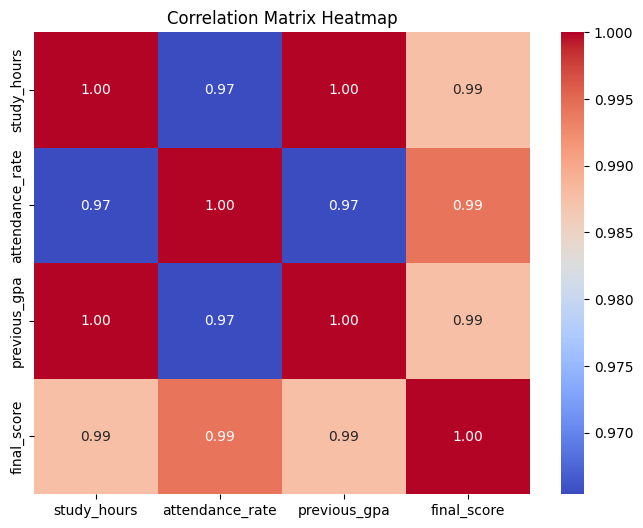

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix Heatmap")
plt.show()

We now focus on how each feature correlates with the target variable
(**final_score**).

In [6]:
corr_with_target = corr_matrix["final_score"].sort_values(ascending=False)
corr_with_target

final_score        1.000000
attendance_rate    0.994244
study_hours        0.987658
previous_gpa       0.987658
Name: final_score, dtype: float64

Features with higher correlation (absolute value) with the target
are generally more useful for linear regression models.

However:
- Correlation does not imply causation
- High correlation between features may cause multicollinearity

If two input features are highly correlated with each other,
they may provide redundant information to the model.

This is known as **multicollinearity** and can make coefficient
interpretation unreliable.

In [7]:
corr_matrix.loc[
    ["study_hours", "attendance_rate", "previous_gpa"],
    ["study_hours", "attendance_rate", "previous_gpa"]
]

,study_hours,attendance_rate,previous_gpa
study_hours,1.000000,0.965404,1.000000
attendance_rate,0.965404,1.000000,0.965404
previous_gpa,1.000000,0.965404,1.000000


Correlation analysis helps us decide:
- Which features to keep
- Which features to remove
- Why some coefficients are larger than others

This step is critical before applying:
- Multiple Linear Regression
- Ordinary Least Squares (OLS)